# Pymaceuticals Inc.

Analysis
- Capomulin and Ramicane show the highest total number of observed mouse timepoints
- A higher number of male mice particpated in the study
- There is a relatively positive relationship between mice weight and the average tumor volume, due to the correlation coefficient being above zero and close to 1 (at 0.84)
 
 

In [38]:
# Dependencies and Setup
import os
import csv
from pathlib import Path
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress


In [2]:
# Check path
#os.chdir("/Users/rsbri/data_visualisation-challenge")
#print(os.getcwd())

In [3]:
# Import files
mouse_metadata_path = os.path.join('data', 'mouse_metadata.csv')
study_results_path = os.path.join('data', 'study_results.csv')


In [4]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [5]:
# Combine the data into a single DataFrame
# mouse_df.columns
mouse_df = mouse_metadata
mouse_df = mouse_df[["Mouse ID", "Drug Regimen", "Sex", "Age_months", "Weight (g)"]] 

# study_df.columns
study_df = study_results
study_df = study_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites"]] 

# merged df
merged_df = pd.merge(mouse_df, study_df, how= "left", on=["Mouse ID", "Mouse ID"])


In [6]:
# Checking the number of mice.
unique_id = merged_df["Mouse ID"].unique()
mice_count = len(unique_id)
print(f"Mice Count: {mice_count}") 


Mice Count: 249


In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
merged_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df
duplicate_mice[duplicate_mice.duplicated(subset=['Mouse ID', 'Timepoint'])]["Mouse ID"].unique()


array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_df = merged_df
g989_df = g989_df.loc[g989_df['Mouse ID'] == 'g989']
g989_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = merged_df[merged_df["Mouse ID"]!="g989"]
clean_mouse_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.
unique_id = clean_mouse_df["Mouse ID"].unique()
mice_count = len(unique_id)
print(f"Mice Count: {mice_count}")


Mice Count: 248


## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_df = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_df = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_df = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stand_dev_df = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_df = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


In [13]:
# Assemble the resulting series into a single summary DataFrame.
summary_statistics_df = pd.DataFrame({"Mean Tumor Volume": mean_df,
                                      "Median Tumor Volume": median_df,
                                      "Tumor Volume Variance": variance_df,
                                      "Tumor Volume Std. Dev.": stand_dev_df,
                                      "Tumor Volume Std. Err.": sem_df
                                     })
summary_statistics_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_statistics_df = clean_mouse_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].aggregate(['mean', 'median', 'var', 'std', 'sem'])
agg_summary_statistics_df = agg_summary_statistics_df
agg_summary_statistics_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
drug_counts = clean_mouse_df['Drug Regimen'].value_counts()
drug_counts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0, 0.5, '# of Observed Mouse Timepoints')

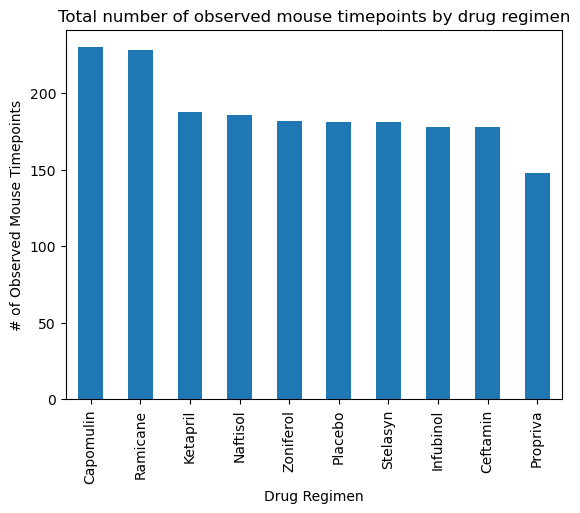

In [16]:
drug_counts.plot(kind='bar', title='Total number of observed mouse timepoints by drug regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')


In [17]:
# Store index values [Drug Regimen] as an array
drug_counts.index.values

array(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Placebo', 'Stelasyn', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype=object)

In [18]:
# Store index values [Timepoints] as an array
drug_counts.values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148], dtype=int64)

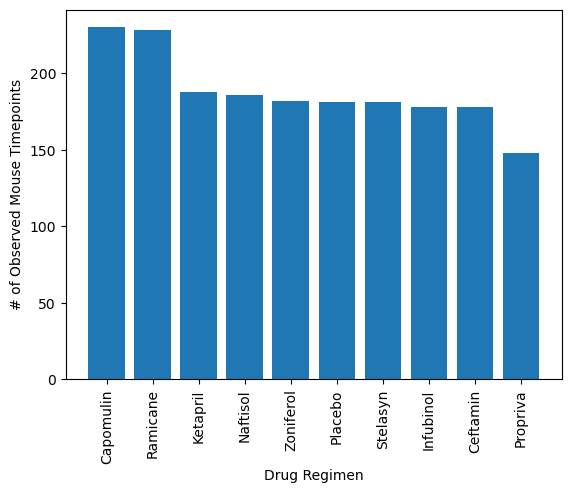

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot
plt.bar(drug_counts.index.values, drug_counts.values)
plt.xlabel('Drug Regimen')
plt.xticks(rotation = 90)
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()


In [20]:
# Find value of male versus female mice
gender_df = clean_mouse_df
gender_df = gender_df[["Sex"]].groupby("Sex").value_counts().sort_values(ascending=False)
gender_df

Sex
Male      958
Female    922
dtype: int64

<Axes: >

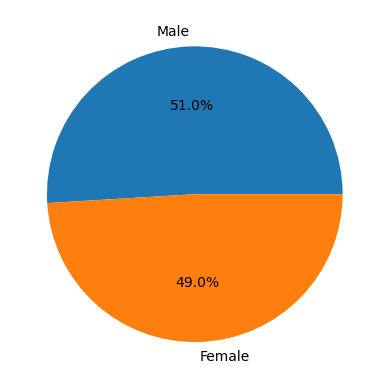

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df.plot.pie(y='sex', autopct="%1.1f%%")

In [22]:
# Store index values [Sex] as an array
label = gender_df
label.index.values
gender = label.index.values
gender


array(['Male', 'Female'], dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

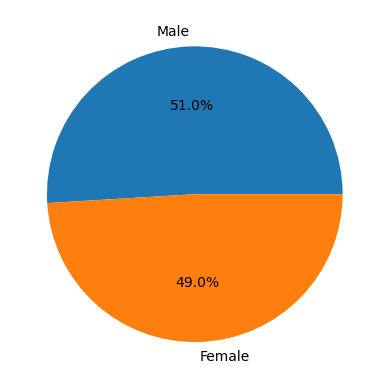

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_df, labels=gender, autopct='%1.1f%%')
plt.show


## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [25]:
#Reduce clean mouse df to drug regimen and timepoint columns only
reduced_mouse_timepoint_df = clean_mouse_df.iloc[:, [0,1,5]]
reduced_mouse_timepoint_df.head()


,Mouse ID,Drug Regimen,Timepoint
0,k403,Ramicane,0
1,k403,Ramicane,5
2,k403,Ramicane,10
3,k403,Ramicane,15
4,k403,Ramicane,20


In [26]:
# Start by getting the last (greatest) timepoint for each mouse - ensure create df that just contains max data points - just 2 columns required - then use merge fnction using merg + clean df
capomulin_df = reduced_mouse_timepoint_df.loc[reduced_mouse_timepoint_df['Drug Regimen'] == 'Capomulin'].groupby(['Mouse ID']).max()
capomulin_df.head()

ramicane_df = reduced_mouse_timepoint_df.loc[reduced_mouse_timepoint_df['Drug Regimen'] == 'Ramicane'].groupby(['Mouse ID']).max()
ramicane_df.head()

infubinol_df = reduced_mouse_timepoint_df.loc[reduced_mouse_timepoint_df['Drug Regimen'] == 'Infubinol'].groupby(['Mouse ID']).max()
infubinol_df.head()

ceftamin_df = reduced_mouse_timepoint_df.loc[reduced_mouse_timepoint_df['Drug Regimen'] == 'Ceftamin'].groupby(['Mouse ID']).max()
ceftamin_df.head()


,Drug Regimen,Timepoint
Mouse ID,,
a275,Ceftamin,45
b447,Ceftamin,0
b487,Ceftamin,25
b759,Ceftamin,30
f436,Ceftamin,15


In [27]:
timepoint_df = pd.concat([capomulin_df,ramicane_df,infubinol_df,ceftamin_df])
timepoint_df


,Drug Regimen,Timepoint
Mouse ID,,
b128,Capomulin,45
b742,Capomulin,45
f966,Capomulin,20
g288,Capomulin,45
g316,Capomulin,45
...,...,...
x226,Ceftamin,0
x581,Ceftamin,45
x822,Ceftamin,45


In [28]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_time_tumor_df = pd.merge(timepoint_df, clean_mouse_df, how="left", on=["Mouse ID", "Timepoint"])
merged_time_tumor_df

# Drop duplicate column
updated_time_tumor_headers_df = merged_time_tumor_df.drop(merged_time_tumor_df.columns[3], axis = 1)
updated_time_tumor_headers_df

# Rename headers
renamed_time_tumor_df = updated_time_tumor_headers_df.rename(columns={"Drug Regimen_x":"Drug Regimen", "Timepoint":"Max Timepoint", "Tumor Volume (mm3)":"Final Tumor Volume (mm3)"})
renamed_time_tumor_df.head(78)


,Mouse ID,Drug Regimen,Max Timepoint,Sex,Age_months,Weight (g),Final Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,45,Female,9,22,38.982878,2
1,b742,Capomulin,45,Male,7,21,38.939633,0
2,f966,Capomulin,20,Male,16,17,30.485985,0
3,g288,Capomulin,45,Male,3,19,37.074024,1
4,g316,Capomulin,45,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
73,y163,Infubinol,45,Female,17,27,67.685569,3
74,z581,Infubinol,45,Female,24,25,62.754451,3
75,a275,Ceftamin,45,Female,20,28,62.999356,3
76,b447,Ceftamin,0,Male,2,30,45.000000,0


In [29]:
# Put treatments into a list for for loop (and later for plot labels)
list_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
list_treatments

# Create empty list to fill with tumor vol data (for plotting)
empty_tumor_volumes = []
empty_tumor_volumes

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
data = renamed_time_tumor_df

for drug in list_treatments:
    final_tumor_vol = data.loc[data["Drug Regimen"] == drug, 'Final Tumor Volume (mm3)']
    #print(final_tumor_vol)
    
    # add subset
    empty_tumor_volumes.append(final_tumor_vol)
    #print(empty_tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq 
    
    # Calculate upper/lower bounds
    lowerb = lowerq - (1.5*iqr)
    upperb = upperq + (1.5*iqr)
    
    # Potential outliers
    pot_outliers = final_tumor_vol[(final_tumor_vol < lowerb) | (final_tumor_vol > upperb)]
    print(f"{list_treatments} Potential outliers: {pot_outliers}")

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] Potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] Potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] Potential outliers: 55    36.321346
Name: Final Tumor Volume (mm3), dtype: float64
['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] Potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)


<function matplotlib.pyplot.show(close=None, block=None)>

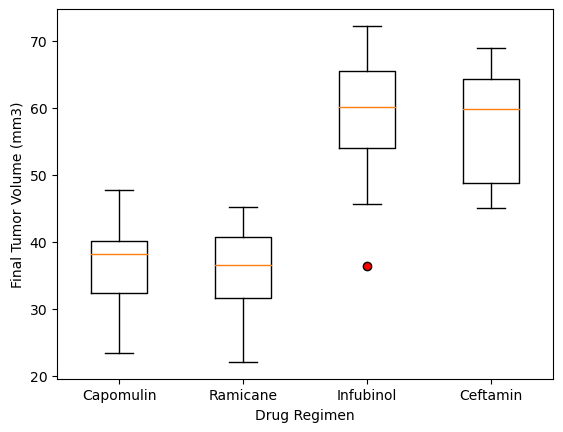

In [30]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumors = empty_tumor_volumes

fig1, ax1 = plt.subplots()
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumors,labels=list_treatments, flierprops = dict(marker = "o", markerfacecolor = "red"))
plt.show


## Line and Scatter Plots

In [31]:
#review df and timepoint column number
mouse_l509 = clean_mouse_df[clean_mouse_df["Mouse ID"] == 'l509']
mouse_l509

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207288,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


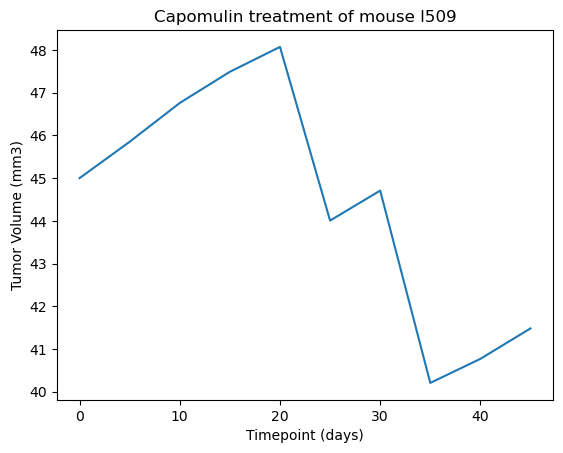

In [32]:
# Generate a line plot of tumor volume vs. time point for a single mouse l509 treated with Capomulin
mouse_l509 = clean_mouse_df[clean_mouse_df["Mouse ID"] == 'l509'].iloc[:,[5,6]]
mouse_l509

x_axis = mouse_l509['Timepoint']
y_axis = mouse_l509['Tumor Volume (mm3)']
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509") 
plt.plot(x_axis, y_axis)
plt.show()


In [34]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomilin_data = clean_mouse_df[clean_mouse_df["Drug Regimen"] == 'Capomulin']
capomilin_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [36]:
# obtain average tumor volume
avg_tum_vol = capomilin_data.groupby(['Mouse ID'])['Weight (g)','Tumor Volume (mm3)'].mean()
avg_tum_vol.head()


C:\Users\rsbri\AppData\Local\Temp\ipykernel_10156\343081929.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_tum_vol = capomilin_data.groupby(['Mouse ID'])['Weight (g)','Tumor Volume (mm3)'].mean()


,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344


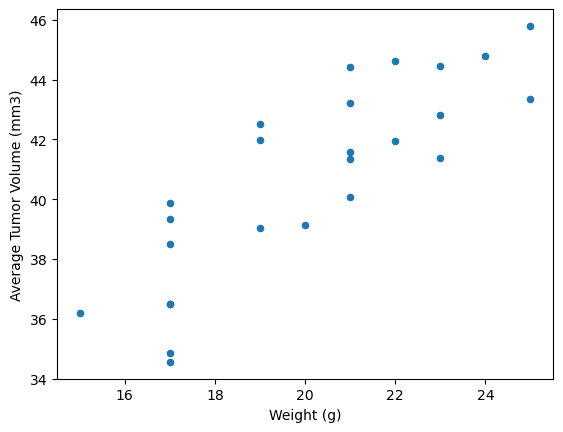

In [37]:
avg_tum_vol.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


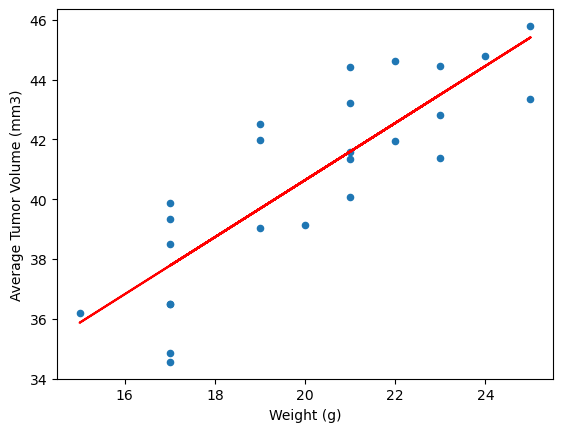

In [43]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen (using dfs taken from previous cell) 

# calculate the correlation coeffient
weight = avg_tum_vol['Weight (g)']
average_tv = avg_tum_vol['Tumor Volume (mm3)']
correlation = st.pearsonr(weight,average_tv)[0]
correlation_2dp = correlation.round(2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation_2dp}")

# plot
avg_tum_vol.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
slope, intercept, rvalue, pvalue, stderr = linregress(avg_tum_vol)
regression = weight * slope + intercept
plt.plot(weight, regression, color='red')
plt.show()
